[*********************100%***********************]  1 of 1 completed

Epoch 1/150



2025-02-07 09:01:07.411564: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3 Pro
2025-02-07 09:01:07.411622: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 18.00 GB
2025-02-07 09:01:07.411632: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 6.00 GB
2025-02-07 09:01:07.411674: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-02-07 09:01:07.411691: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
/opt/anaconda3/envs/deeplearning-env/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When us

23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - loss: 0.0155 - val_loss: 0.0038 - learning_rate: 0.0010
Epoch 2/150
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.0019 - val_loss: 0.0096 - learning_rate: 0.0010
Epoch 3/150
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0011 - val_loss: 0.0018 - learning_rate: 0.0010
Epoch 4/150
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0011 - val_loss: 0.0017 - learning_rate: 0.0010
Epoch 5/150
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 7.5805e-04 - val_loss: 0.0024 - learning_rate: 0.0010
Epoch 6/150
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 8.3595e-04 - val_loss: 0.0016 - learning_rate: 0.0010
Epoch 7/150
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 9.1992e-04 - val_loss: 0.0018 - learning_rate: 0.0010
Epoch 8/150
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 8.4661e-04 - val_loss: 0.0019 - learning_rate: 0.0010
Epoch 9/150
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 8.7474e-04 - val_loss: 0.0022 - learning_rate: 0.0010
E

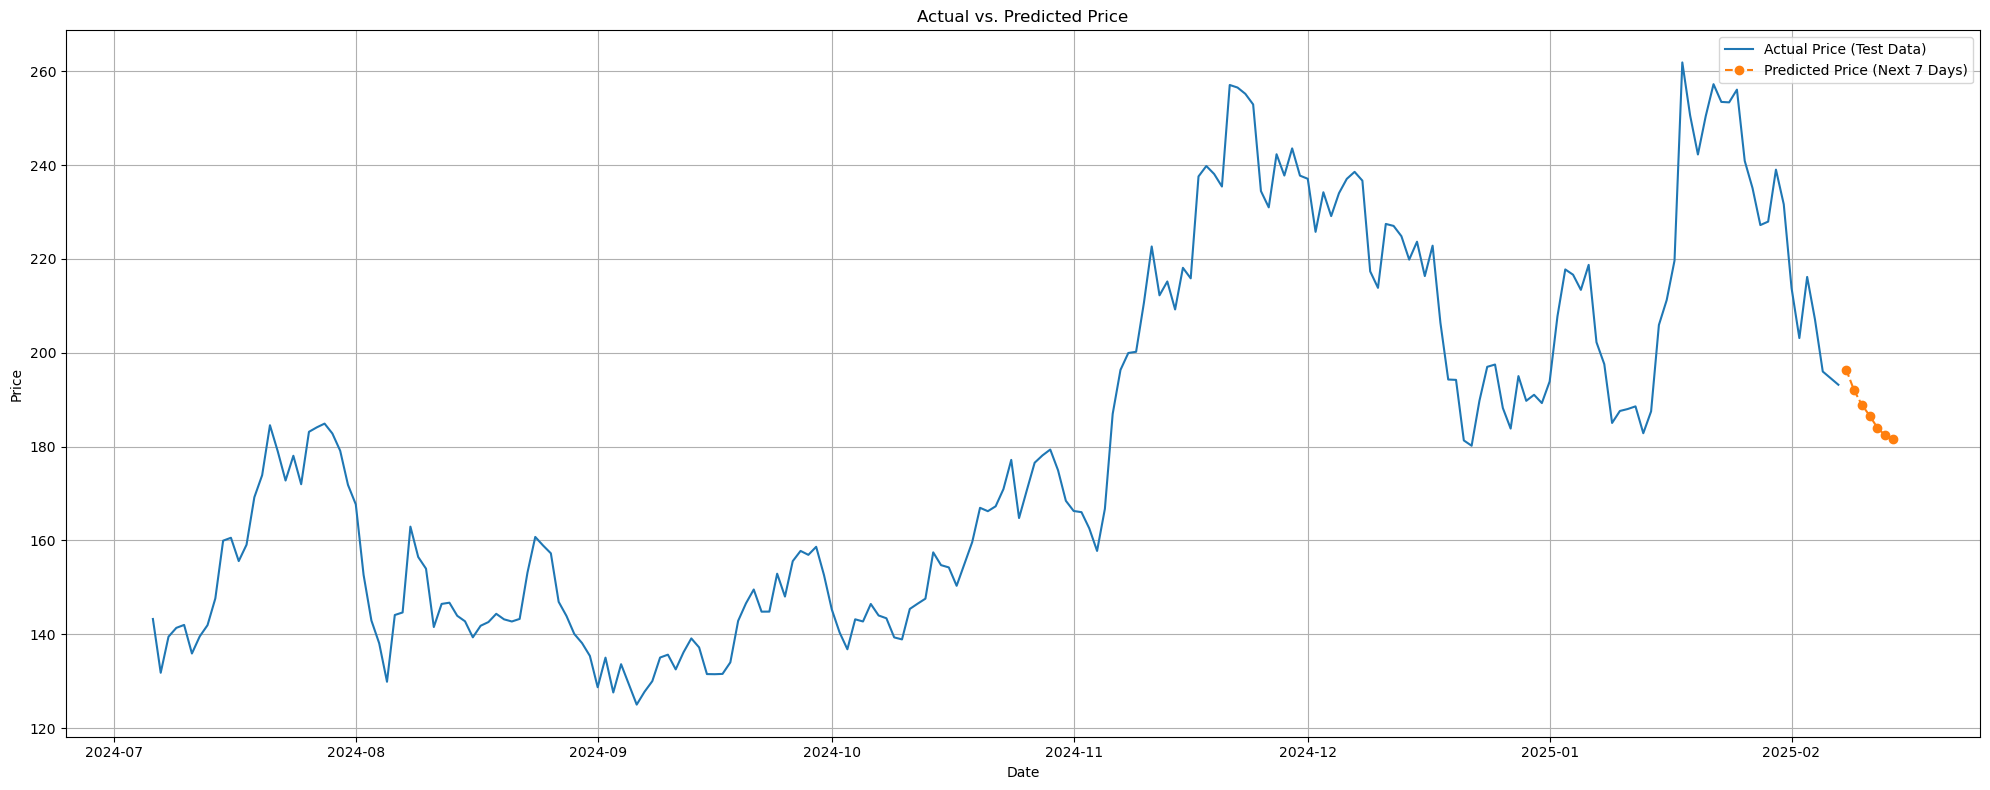

Predicted Price for 2025-02-08 00:00:00: 196.4131231039316
Predicted Price for 2025-02-09 00:00:00: 192.03524260960646
Predicted Price for 2025-02-10 00:00:00: 188.91434664461573
Predicted Price for 2025-02-11 00:00:00: 186.60340314499464
Predicted Price for 2025-02-12 00:00:00: 183.99630240633311
Predicted Price for 2025-02-13 00:00:00: 182.37492420607984
Predicted Price for 2025-02-14 00:00:00: 181.68459220523025


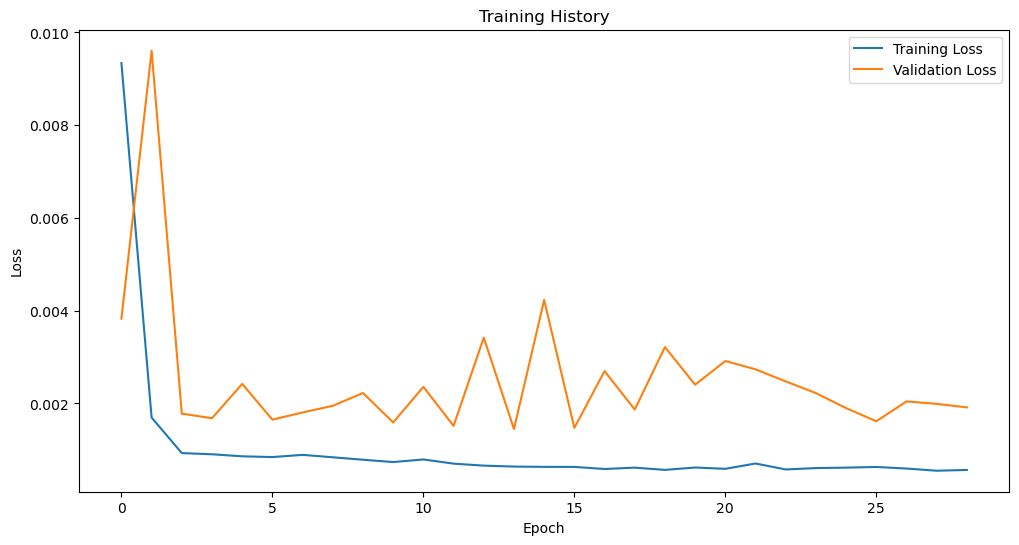

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Bidirectional  # Import Bidirectional
from keras.callbacks import EarlyStopping, ReduceLROnPlateau # Import ReduceLROnPlateau
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

# Data Loading and Feature Engineering (same as before)
data = yf.download('SOL-USD', start='2022-01-01')
data['EMA'] = data['Close'].ewm(span=7, adjust=False).mean()
data['STD'] = data['Close'].rolling(window=7).std()
data['MA7'] = data['Close'].rolling(window=7).mean()
data['MA21'] = data['Close'].rolling(window=21).mean()
# Bollinger Bands
data['Upper_Band'] = data['Close'].rolling(window=20).mean() + data['Close'].rolling(window=20).std() * 2
data['Lower_Band'] = data['Close'].rolling(window=20).mean() - data['Close'].rolling(window=20).std() * 2

# MACD
data['EMA_12'] = data['Close'].ewm(span=12, adjust=False).mean()
data['EMA_26'] = data['Close'].ewm(span=26, adjust=False).mean()
data['MACD'] = data['EMA_12'] - data['EMA_26']
data['Signal'] = data['MACD'].ewm(span=9, adjust=False).mean()  # 9-day EMA of MACD

data = data.dropna()  # Drop rows with NaN values after calculating indicators

features = ['Close','MACD']  # All features included


dataset = data[features].values

# Scaling (Important: Scale before train/test split)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

# Train-Test Split (same as before)
train_data, test_data = train_test_split(scaled_data, test_size=0.2, shuffle=False)

# Dataset Creation (same as before)
look_back = 7
def create_dataset(data, look_back=7):
    X, y = [], []
    for i in range(look_back, len(data)):
        X.append(data[i-look_back:i, :])
        y.append(data[i, 0])  # Target is 'Close'
    return np.array(X), np.array(y)

X_train, y_train = create_dataset(train_data, look_back=look_back)
X_test, y_test = create_dataset(test_data, look_back=look_back)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2]))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], X_test.shape[2]))

# Improved Model Building (More Complex Architecture)
model = Sequential()

# Improved Model Building (More Complex Architecture)
model = Sequential()

# Bidirectional LSTM layer
model.add(Bidirectional(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]))))
model.add(Dropout(0.2))

# Additional LSTM layers
model.add(LSTM(units=64, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=32))
model.add(Dropout(0.2))

# Dense layer for output
model.add(Dense(units=1))

# Compile the model with a potentially different optimizer (Adam with adjusted learning rate)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')  # Adjusted learning rate

# Improved Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True) #increased patience
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.0001) #learning rate reduction

history = model.fit(X_train, y_train, epochs=150, batch_size=32, validation_split=0.2, 
                    callbacks=[early_stopping, reduce_lr], verbose=1) # Added ReduceLROnPlateau

# Prediction and Evaluation on Test Set (Corrected Inverse Transform)
y_pred_scaled = model.predict(X_test)

# Create the dummy array *once* based on the original dataset's features
dummy_array = np.zeros((y_pred_scaled.shape[0], dataset.shape[1]))
dummy_array[:, 0] = y_pred_scaled[:, 0]
y_pred = scaler.inverse_transform(dummy_array)[:, 0]

dummy_array_test = np.zeros((y_test.shape[0], dataset.shape[1]))
dummy_array_test[:, 0] = y_test
y_test_original = scaler.inverse_transform(dummy_array_test)[:, 0]

mse = mean_squared_error(y_test_original, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_original, y_pred)
r2 = r2_score(y_test_original, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R^2): {r2}")

# Future Prediction (Corrected Inverse Transform and Data Update)
n_predictions = 7
predictions = []
last_lookback_days = scaled_data[-look_back:]

for i in range(n_predictions):
    X_pred = np.array([last_lookback_days])
    X_pred = np.reshape(X_pred, (X_pred.shape[0], X_pred.shape[1], X_pred.shape[2]))
    predicted_data_scaled = model.predict(X_pred)

    # Use the *same* dummy array for future predictions
    dummy_array_future = np.zeros((predicted_data_scaled.shape[0], dataset.shape[1]))
    dummy_array_future[:, 0] = predicted_data_scaled[:, 0]
    predicted_price = scaler.inverse_transform(dummy_array_future)[0, 0]
    predictions.append(predicted_price)

    # Update scaled data correctly (using the *scaled* prediction)
    new_scaled_data_point = np.zeros((1, dataset.shape[1]))
    new_scaled_data_point[0, 0] = predicted_data_scaled[0, 0] # Use the scaled prediction
    scaled_data = np.concatenate([scaled_data, new_scaled_data_point], axis=0)
    last_lookback_days = scaled_data[-look_back:]

# Plotting (Improved)
plt.figure(figsize=(20, 8))

# Plot actual values (full range or last part)
plt.plot(data.index[-len(y_test_original):], y_test_original, label='Actual Price (Test Data)')  # Plot against test data indices

# Plot predictions
future_dates = pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=n_predictions)
plt.plot(future_dates, predictions, label='Predicted Price (Next 7 Days)', marker='o', linestyle='--')


plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual vs. Predicted Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

for i in range(n_predictions):
    print(f"Predicted Price for {future_dates[i]}: {predictions[i]}")

#Plot training history
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training History')
plt.legend()
plt.show()

In [20]:
data.corr(method='pearson')

,Price,Close,High,Low,Open,Volume,EMA,STD,MA7,MA21,Upper_Band,Lower_Band,EMA_12,EMA_26,MACD,Signal
,Ticker,SOL-USD,SOL-USD,SOL-USD,SOL-USD,SOL-USD,,,,,,,,,,
Price,Ticker,,,,,,,,,,,,,,,
Close,SOL-USD,1.000000,0.998821,0.998583,0.997215,0.686517,0.996260,0.740785,0.994503,0.981314,0.980090,0.968171,0.992686,0.982963,0.343797,0.350642
High,SOL-USD,0.998821,1.000000,0.998140,0.998729,0.701653,0.996916,0.751666,0.995437,0.982242,0.982025,0.967751,0.993496,0.983858,0.343026,0.351161
Low,SOL-USD,0.998583,0.998140,1.000000,0.998472,0.666387,0.996465,0.728939,0.994929,0.981645,0.979355,0.969898,0.992998,0.983320,0.343365,0.351135
Open,SOL-USD,0.997215,0.998729,0.998472,1.000000,0.682456,0.997725,0.739709,0.996653,0.983893,0.982438,0.970972,0.994695,0.985343,0.340083,0.351537
Volume,SOL-USD,0.686517,0.701653,0.666387,0.682456,1.000000,0.672490,0.777792,0.669629,0.644383,0.669439,0.603814,0.662995,0.644157,0.368905,0.344512
EMA,,0.996260,0.996916,0.996465,0.997725,0.672490,1.000000,0.739675,0.999659,0.991595,0.989200,0.979460,0.999043,0.992254,0.312196,0.337403
STD,,0.740785,0.751666,0.728939,0.739709,0.777792,0.739675,1.000000,0.738665,0.730585,0.760030,0.680021,0.737923,0.734591,0.211608,0.207214
MA7,,0.994503,0.995437,0.994929,0.996653,0.669629,0.999659,0.738665,1.000000,0.991073,0.988746,0.978942,0.998802,0.991701,0.315656,0.343139


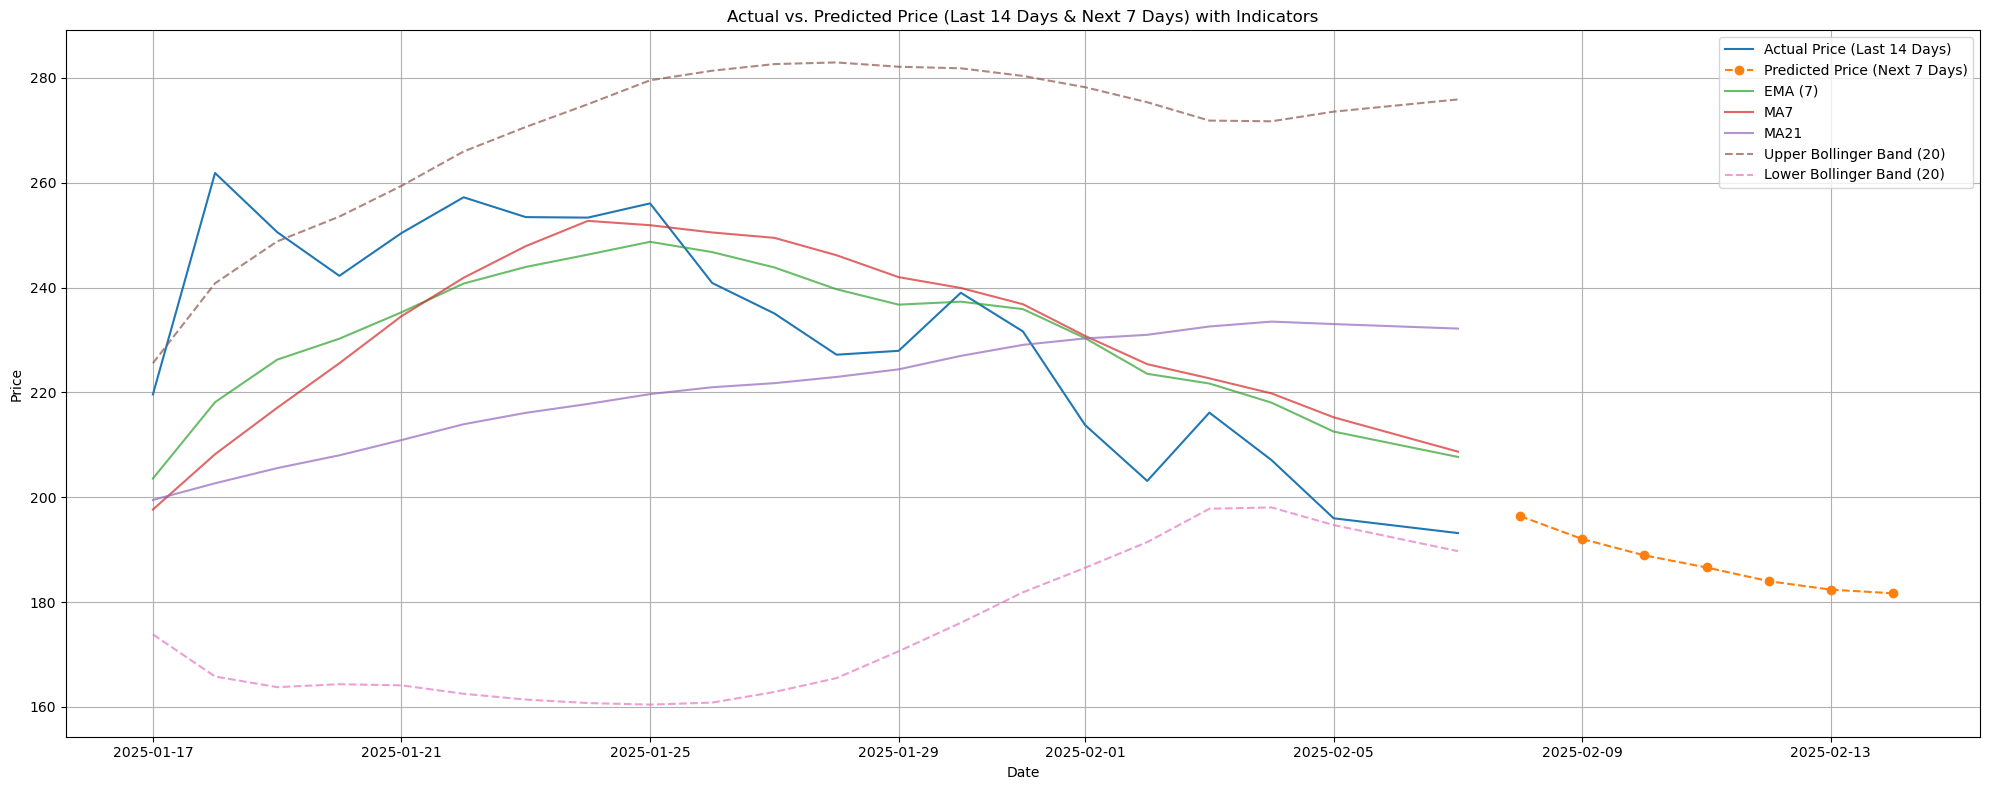

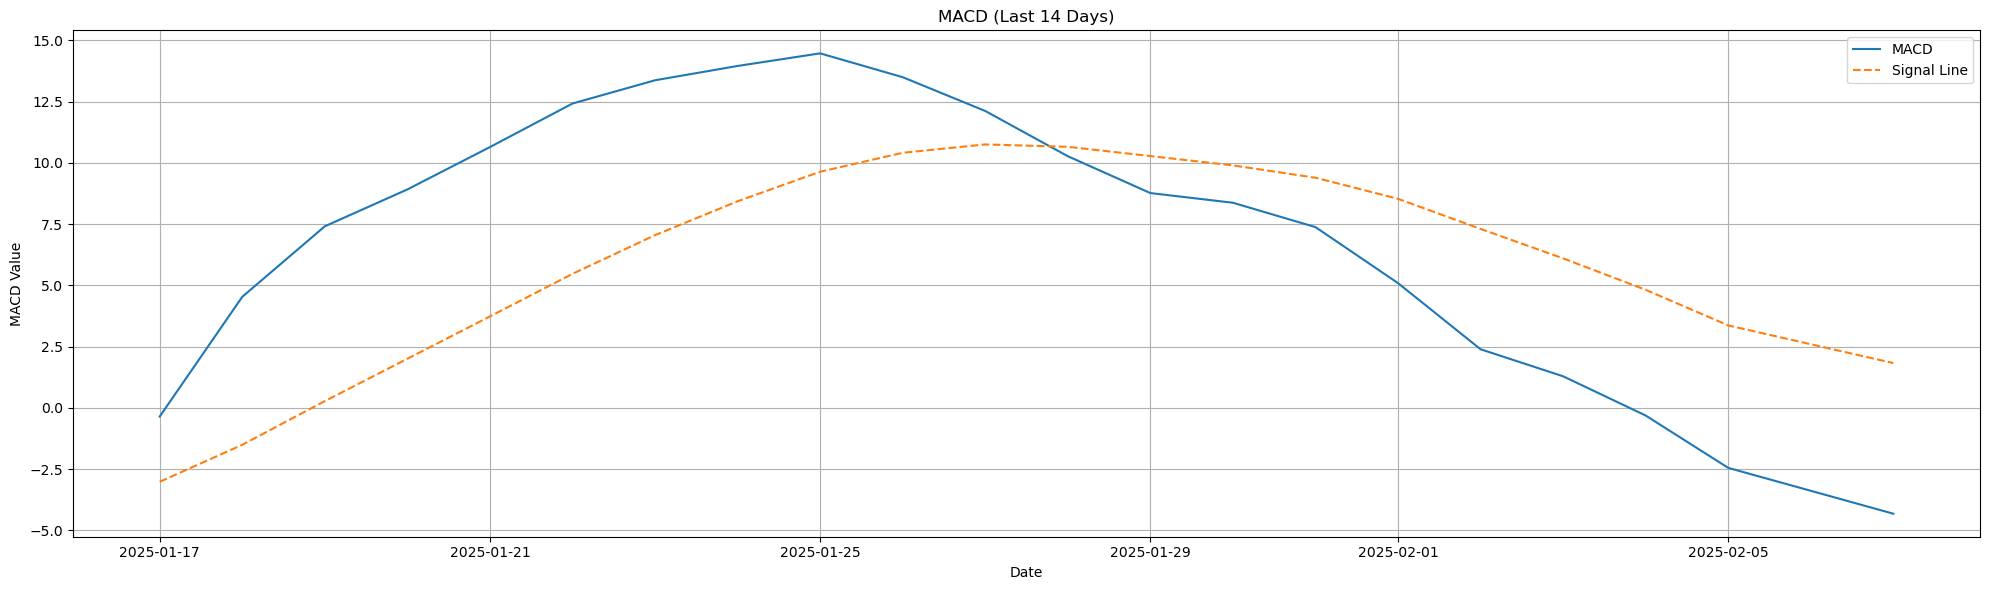

In [2]:
# Calculate the start date for the last 14 days
last_14_days_start = data.index[-21]

plt.figure(figsize=(20, 8))

# Plot actual values for the last 14 days
plt.plot(data.index[-21:], data['Close'][-21:], label='Actual Price (Last 14 Days)')  # Use data['Close'] directly

# Plot actual values for the test set (if it falls within the last 14 days)
# test_data_indices_within_14_days = data.index[data.index.get_loc(last_14_days_start):].intersection(data.index[-len(y_test_original):])
# if len(test_data_indices_within_14_days) > 0:
#     plt.plot(test_data_indices_within_14_days, y_test_original[np.isin(data.index[-len(y_test_original):], test_data_indices_within_14_days)], label='Actual Price (Test Data - within 14 days)') 

# Plot predictions for the next 7 days
future_dates = pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=n_predictions)
plt.plot(future_dates, predictions, label='Predicted Price (Next 7 Days)', marker='o', linestyle='--')

# Plot Technical Indicators (for the last 14 days)
plt.plot(data.index[-21:], data['EMA'][-21:], label='EMA (7)', alpha=0.7)
plt.plot(data.index[-21:], data['MA7'][-21:], label='MA7', alpha=0.7)
plt.plot(data.index[-21:], data['MA21'][-21:], label='MA21', alpha=0.7)

# Plot Bollinger Bands (for the last 14 days)
plt.plot(data.index[-21:], data['Upper_Band'][-21:], label='Upper Bollinger Band (20)', linestyle='--', alpha=0.7)
plt.plot(data.index[-21:], data['Lower_Band'][-21:], label='Lower Bollinger Band (20)', linestyle='--', alpha=0.7)

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual vs. Predicted Price (Last 14 Days & Next 7 Days) with Indicators')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Plotting MACD and Signal Line (for the last 14 days)
plt.figure(figsize=(20, 6))
plt.plot(data.index[-21:], data['MACD'][-21:], label='MACD')
plt.plot(data.index[-21:], data['Signal'][-21:], label='Signal Line', linestyle='--')
plt.xlabel('Date')
plt.ylabel('MACD Value')
plt.title('MACD (Last 14 Days)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [3]:
model.save("sol_price_prediction_model.h5")

In [4]:
import pickle  # For serializing Python objects

with open("sol_price_scaler.pkl", "wb") as file:
    pickle.dump(scaler, file)

print("Model and scaler saved successfully!")

Model and scaler saved successfully!
